In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/drive/MyDrive/딥러닝/DNN/train.csv')
df.head()

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0


In [3]:
df.shape #총 652개 데이터

(652, 10)

Pregnancies : 임신횟수

Glucose : 포도당 농도

BloodPressure : 혈압

SkinThickness : 피부두께

Insulin : 인슐린

BMI : 체질량지수

DiabetesPedigreeFunction : 당뇨병 혈통 기능

Age : 나이

Outcome : 당뇨병 여부(0: 발병되지 않음, 1: 발병)

In [4]:
df['Outcome'].value_counts() #이진 분류 가능.

0    424
1    228
Name: Outcome, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        652 non-null    object 
 1   Pregnancies               652 non-null    int64  
 2   Glucose                   652 non-null    int64  
 3   BloodPressure             652 non-null    int64  
 4   SkinThickness             652 non-null    int64  
 5   Insulin                   652 non-null    int64  
 6   BMI                       652 non-null    float64
 7   DiabetesPedigreeFunction  652 non-null    float64
 8   Age                       652 non-null    int64  
 9   Outcome                   652 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 51.1+ KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,3.923313,120.946319,68.895706,20.440184,80.878834,31.947393,0.465133,33.510736,0.349693
std,3.327529,31.992394,19.183843,15.918604,117.748315,7.460975,0.329496,11.824817,0.477239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.238750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.363000,29.500000,0.000000
75%,6.000000,142.000000,80.000000,32.000000,126.000000,36.425000,0.607750,41.000000,1.000000
max,15.000000,199.000000,114.000000,99.000000,846.000000,57.300000,2.329000,81.000000,1.000000


### EDA 탐색적 분석 & 데이터 전처리

In [7]:
df.drop('ID', axis =1, inplace = True) #맨 앞 인덱스 삭제

In [8]:
list(df.columns)[:-1] #outcome제외

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

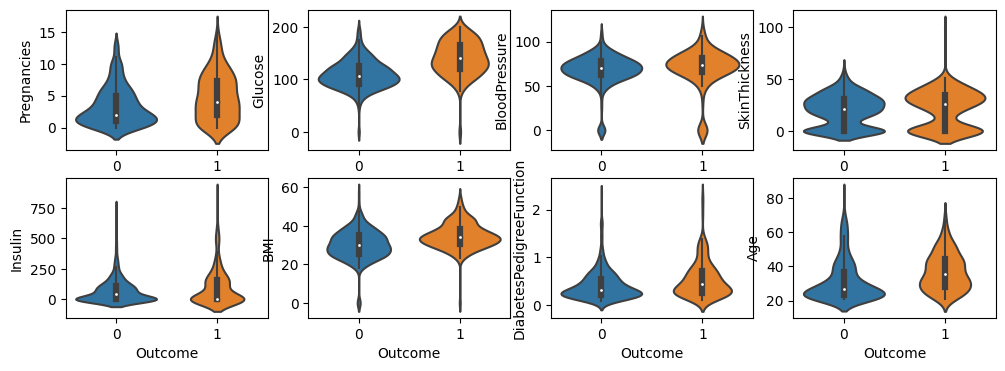

In [9]:
fig, axs = plt.subplots(nrows = 2,ncols = 4, figsize=(12, 4))
features = list(df.columns)[:-1]
for i, feature in enumerate(features):
    row = int(i/4)
    col = i%4
    sns.violinplot(x='Outcome', y= feature, data= df, ax = axs[row][col]) #보통 각 피처들 값이 올라갈수록

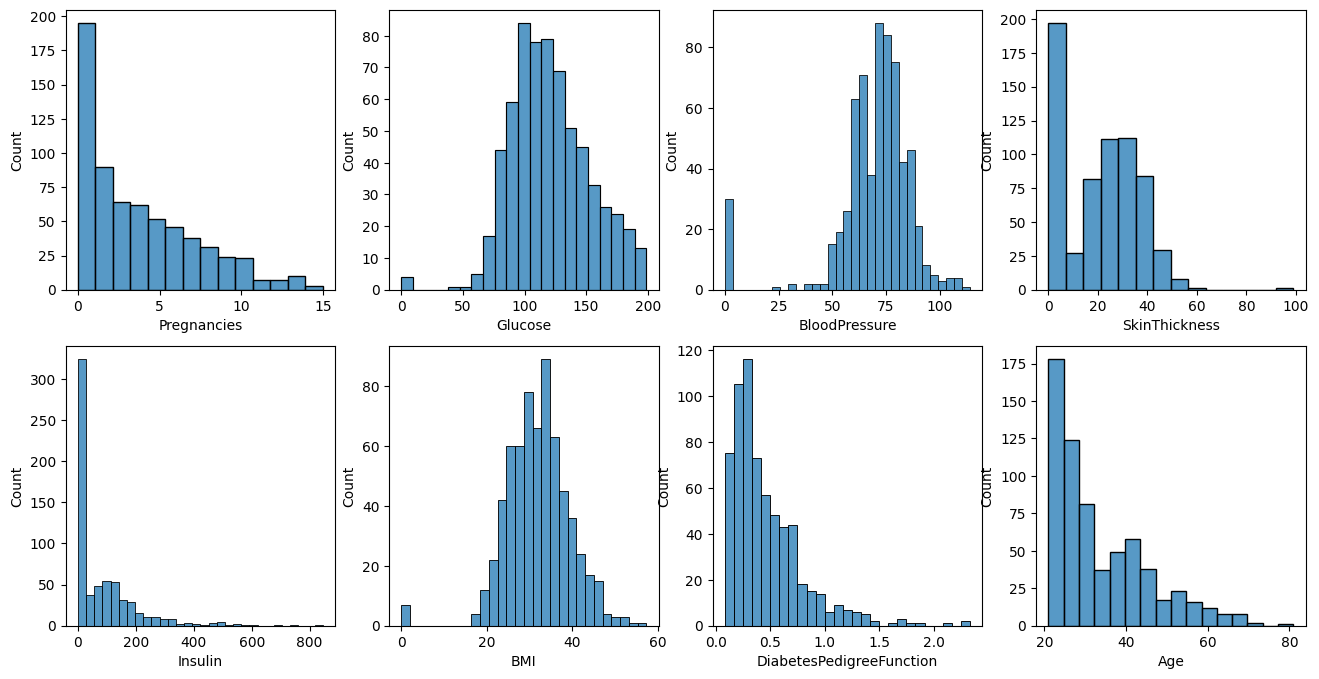

In [10]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐
#각 피처들의 분포 파악 필요시 스케일링
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.histplot(x=feature,data=df , ax=axs[row][col])
    #인슐린과 포도당 등 빈도수를 보면 0인것들이 많다. 그런데 피부두깨나 포도당등이 0인것은 말이 안된다.

In [11]:
mean_ft=pd.Series(df.mean())[:-1]
print(mean_ft) #평균값 확인

Pregnancies                   3.923313
Glucose                     120.946319
BloodPressure                68.895706
SkinThickness                20.440184
Insulin                      80.878834
BMI                          31.947393
DiabetesPedigreeFunction      0.465133
Age                          33.510736
dtype: float64


In [12]:
outline = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for i in outline:
    df[i].replace(0, np.mean(df[i]), inplace=True) #평균값으로 대체

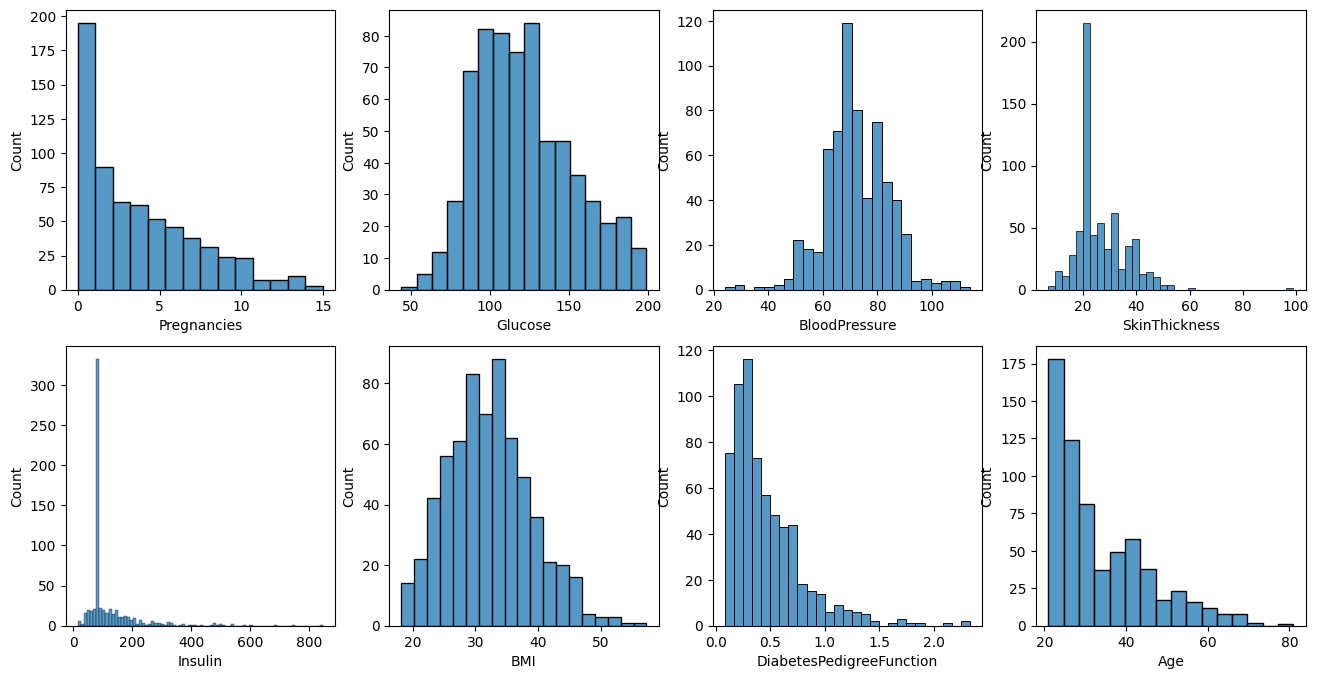

In [13]:
# 재확인
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.histplot(x=feature,data=df , ax=axs[row][col])
    #많았던 0 부분 사라짐

### 데이터 분리

In [14]:
#라이브러리 불러오기
import torch
import torch.nn as nn
import torch.optim as optim #학습 경사하강법
import torch.utils.data as data_utils #데이터 만들어주는 함수
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import Dataset, DataLoader, TensorDataset

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

In [15]:
#데이터 혼합(랜덤으로 섞어줌)
#꼭 해야할까..
data = df.sample(frac=1).reset_index(drop= True)
data #무작위 랜덤

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,180.0,90.0,26.000000,90.000000,36.500000,0.314,35,1
1,2,122.0,52.0,43.000000,158.000000,36.200000,0.816,28,0
2,7,195.0,70.0,33.000000,145.000000,25.100000,0.163,55,1
3,3,148.0,66.0,25.000000,80.878834,32.500000,0.256,22,0
4,2,94.0,76.0,18.000000,66.000000,31.600000,0.649,23,0
...,...,...,...,...,...,...,...,...,...
647,0,177.0,60.0,29.000000,478.000000,34.600000,1.072,21,1
648,9,122.0,56.0,20.440184,80.878834,33.300000,1.114,33,1
649,1,79.0,75.0,30.000000,80.878834,32.000000,0.396,22,0
650,5,116.0,74.0,29.000000,80.878834,32.300000,0.660,35,1


In [16]:
#전처리 스케일링
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [17]:
from sklearn.preprocessing import StandardScaler

ssc=StandardScaler()
scaled_X = ssc.fit_transform(X)

In [18]:
#스케일후 데이터 합치기
df = pd.DataFrame(scaled_X,  columns = X.columns)
df['target'] = data['Outcome']
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
0,-1.179952,1.910421,1.521144,-0.058116,-0.317956,0.631010,-0.459032,0.126041,1
1,-0.578444,0.010211,-1.701934,1.727054,0.394999,0.586040,1.065675,-0.466389,0
2,0.925326,2.401854,-0.175213,0.676954,0.258699,-1.077819,-0.917660,1.818697,1
3,-0.277690,0.862029,-0.514484,-0.163126,-0.413588,0.031421,-0.635194,-0.974186,0
4,-0.578444,-0.907131,0.333694,-0.898196,-0.569587,-0.103487,0.558452,-0.889553,0


In [19]:
#학습, 검증 vs 테스트 데이터 분리
train_val, test = train_test_split(df, shuffle=True, test_size=0.2, random_state=42) #이러면 되지 않나..?

print(train_val.shape)
print(test.shape)

(521, 9)
(131, 9)


In [20]:
train, val =train_test_split(train_val, shuffle=True, test_size=0.3, random_state= 9492)

print(train.shape)
print(val.shape)

(364, 9)
(157, 9)


### 간단한 머신러닝 알고리즘 적용

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


X = train_val.iloc[:, :-1]
y = train_val.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)

accuracy_score(y_test, pred)
#머신러닝 학습시 정확도 약 71퍼

0.802547770700637

### CUDA 적용

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### 데이터 셋 변환(텐서)

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [24]:
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]

val_X = val.iloc[:,:-1]
val_y = val.iloc[:,-1]

#텐서 태우기
trn_x = torch.FloatTensor(train_X.values)
trn_y = torch.FloatTensor(train_y.values)
val_x = torch.FloatTensor(val_X.values)
val_y = torch.FloatTensor(val_y.values) #텐서 태울때 데이터 프레임이면 안됨.

In [25]:
#데이터 셋 변환(텐서 데이터 셋)

train =TensorDataset(trn_x,trn_y)
val =TensorDataset(val_x, val_y)

In [26]:
#데이터 로더 호출

batch = 10

train_loader = DataLoader(train, batch_size=batch, shuffle = True)
val_loader = DataLoader(val, batch_size = batch, shuffle = False)

### 신경망 구현

In [28]:
import torch.nn as nn

class DNN(nn.Module):

  def __init__(self, input_size, output_size, drop_rate):
    super(DNN, self).__init__()

    layer1 = [nn.Linear(input_size, 48),
              nn.BatchNorm1d(48),
              nn.Dropout(drop_rate),
              nn.ReLU()]

    layer2 = [nn.Linear(48, 24),
              nn.BatchNorm1d(24),
              nn.Dropout(drop_rate),
              nn.ReLU()]

    layer3 = [nn.Linear(24, 10),
              nn.BatchNorm1d(10),
              nn.Dropout(drop_rate),
              nn.ReLU()]


    layer4 = [nn.Linear(10, output_size),
              nn.Sigmoid()]


    self.first = nn.Sequential(*layer1)
    self.second = nn.Sequential(*layer2)
    self.third = nn.Sequential(*layer3)
    self.last = nn.Sequential(*layer4)


  def forward(self, x):
    x = self.first(x)
    x = self.second(x)
    x= self.third(x)
    out = self.last(x)

    return out

### 모델 정의 , 파라미터 확인

In [29]:
model = DNN(input_size = 10, output_size = 1, drop_rate = 0.80).to(device)
#기본 구조 model = DNN()

In [30]:
#model 확인
print(model)

DNN(
  (first): Sequential(
    (0): Linear(in_features=10, out_features=48, bias=True)
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.8, inplace=False)
    (3): ReLU()
  )
  (second): Sequential(
    (0): Linear(in_features=48, out_features=24, bias=True)
    (1): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.8, inplace=False)
    (3): ReLU()
  )
  (third): Sequential(
    (0): Linear(in_features=24, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.8, inplace=False)
    (3): ReLU()
  )
  (last): Sequential(
    (0): Linear(in_features=10, out_features=1, bias=True)
    (1): Sigmoid()
  )
)


In [31]:
#print(list(model.parameters())) #이것이 의미하는 바는?

params = list(model.parameters())
print(len(params))
print(params[0].size())

14
torch.Size([48, 10])


In [41]:
#question 이것의 의미?
list(model.parameters())

[Parameter containing:
 tensor([[ 2.3684e-01, -3.8717e-02,  2.8459e-01,  2.4780e-01, -3.0440e-01,
           1.5514e-01, -5.6562e-02,  4.7933e-02,  2.9476e-01,  1.3763e-01],
         [ 1.8870e-01,  2.8614e-01, -2.9698e-01,  9.2510e-02, -3.1016e-01,
          -1.8916e-01, -1.9457e-01,  2.1308e-01, -2.9590e-01,  2.7314e-01],
         [-5.0394e-02,  1.5869e-01,  7.9599e-03, -5.7954e-02, -1.3649e-01,
           1.3530e-01, -1.2474e-01, -2.0291e-01,  1.6933e-01, -9.7944e-02],
         [-5.5094e-02,  4.5877e-02,  1.5361e-01, -2.6508e-02, -3.1338e-01,
          -2.7318e-01, -1.3144e-01,  1.3551e-01,  1.5085e-01, -2.4331e-01],
         [ 5.6857e-02,  2.9135e-01, -3.8231e-02,  2.0932e-01, -2.3557e-01,
          -1.8348e-01, -4.2449e-02, -2.9158e-01, -2.6971e-01,  1.7254e-01],
         [-1.3135e-01,  1.6605e-01,  8.4953e-02, -2.8837e-01, -3.0310e-01,
           1.2520e-01, -1.1974e-01, -2.0080e-01, -1.5983e-02,  2.5692e-01],
         [-1.9924e-01, -2.1884e-01,  1.6777e-01,  5.0577e-02,  1.6030e-

### 손실함수, 옵티 마이저 정의

In [32]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = 1e-3)
#optim을 모델 파라미터를 optim하고 싶다. 의미
#num_epochs = training_kwargs['epoch'] #이거 둘로 가중치 bias 평가 후 조정할 수 있으니

### 학습

In [34]:
epochs = 2
losses = []

for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)

    optimizer.zero_grad()
    pred = model(data)

    loss = criterion(pred, target)
    loss.backward()

    optimizer.step() #단계별 학습 진행

    if ep % 10 == 0:
      print('Epoch:{:3d}\tloss:{:.4f}'.format(ep + 1, loss))



RuntimeError: ignored

In [53]:
import copy
import warnings
warnings.filterwarnings("ignore")
criterion = nn.BCELoss()

def train(model, device, train_loader, optimizer, epoch):
    global criterion #global
    model.train() #이것이 무엇인지..
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data) #output: 64 x 1
        output = output.squeeze(1) #output: 64
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test():
    global criterion
    model2.eval()
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        for batch_idx, (data, target) in enumerate (val_loader):
            valid_loss = {'loss_val' : []}

            data, target = data.to(device), target.to(device)
            outputs = model2(data)
            outputs = outputs.squeeze()

            loss_val = criterion(outputs, target)
            valid_loss['loss_val'].append(loss_val.item())

            outputs = torch.flatten(outputs).cpu().detach().numpy()
            target = torch.flatten(target).cpu().detach().numpy()
            predicted = np.where(outputs>0.5, 1, 0)

            n_samples += len(target)
            n_correct += (predicted == target).sum().item()
            vl_mean = np.array(valid_loss['loss_val']).mean()

            if batch_idx % 100 == 0:
                print('Batch mean Validation Loss: {:.6f}'.format(vl_mean))

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 validation set: {acc} %')
    return acc

In [54]:
OUTPUT_PATH = '/home/user/Code/JE/informs'
best_acc = -1
best_model = None
for epoch in range(0, 2):
    train(model, device, train_loader, optimizer, epoch)
    acc = test()
    if acc > best_acc:
        best_acc = acc
        best_model = copy.deepcopy(model)
        print(f'new best acc={best_acc}')
    else:
        print(f'current acc={acc}, prev_best_acc={best_acc}')

print('best model saved')

RuntimeError: ignored